In [1]:
from node2vec import Node2Vec
import numpy as np
import networkx as nx

In [2]:
edges = np.loadtxt('./data/cora/cora.cites')
G=nx.Graph()
G.add_edges_from(edges)

In [3]:
node2vec = Node2Vec(G, dimensions=20, walk_length=16, num_walks=100)

Generating walks (CPU: 1): 100%|██████████| 100/100 [02:38<00:00,  1.58s/it]


In [5]:
model = node2vec.fit(window=10, min_count=1)

In [6]:
model.wv.save_word2vec_format("node2vec_embeddings.txt")

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.cm as cm

In [9]:
X = np.loadtxt('node2vec_embeddings.txt')

In [10]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [11]:
colors = cm.rainbow(np.linspace(0, 1, 10))

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=99).fit(X_embedded)

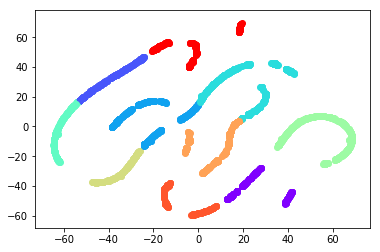

In [21]:
import matplotlib.pyplot as plt
for i in range(X_embedded.shape[0]):
    plt.scatter(X_embedded[i][0],X_embedded[i][1],color=colors[int(kmeans.labels_[i])])
plt.show()

In [40]:
from sklearn.cluster import SpectralClustering

In [43]:
clustering = SpectralClustering(
    n_clusters=7,assign_labels="discretize",random_state=0,n_init=1,n_neighbors=5)

In [ ]:
clustering = clustering.fit(X_embedded)

In [ ]:
import matplotlib.pyplot as plt
for i in range(X_embedded.shape[0]):
    plt.scatter(X_embedded[i][0],X_embedded[i][1],color=colors[int(clustering.labels_[i])])
plt.show()